# Notebook for demo how to get features with [neuron_morphology](https://github.com/AllenInstitute/neuron_morphology)

To obtain the package, please see [https://neuron-morphology.readthedocs.io/en/readthedocs/](https://neuron-morphology.readthedocs.io/en/readthedocs/).

This step-by-step guid will walk you through the whole process of getting the interested features with neuron_morphology.


In [1]:
import sys
sys.path.insert(0, "../")
#import warnings
#warnings.filterwarnings('ignore')

from io import StringIO
import requests
from neuron_morphology.swc_io import morphology_from_swc
from neuron_morphology.feature_extractor.data import Data
from neuron_morphology.feature_extractor.feature_extractor import FeatureExtractor
import neuron_morphology.feature_extractor.feature_writer as fw
from neuron_morphology.features.default_features import default_features

import matplotlib.pyplot as plt
import json
import numpy as np

## Pick your neuron (.swc/.csv)

Here select one SWC file as an example.

In [2]:
def data_from_url(morphology_url):
    morphology_swc = StringIO(requests.get(morphology_url).text)

    # Feature functions expect a Data object - in this case just a wrapper for a Morphology
    # If we were working with additional data (say, layer annotations) we would store these here as well
    return Data(morphology_from_swc(morphology_swc))

# fetch a published reconstruction
IVSCC_swc_file = "http://celltypes.brain-map.org/api/v2/well_known_file_download/491120375"

## Load SWC file as morphology data

We can load the SWC file into our morphology data object and then calculate features on it.

Text(0.5, 1.0, 'z-y view')

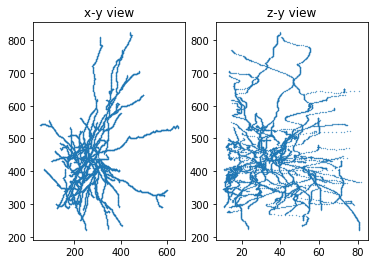

In [3]:
# fetch a published reconstruction 
test_data = data_from_url(IVSCC_swc_file)

# directly load a swc file given its file path
# test_data = Data(morphology_from_swc(IVSCC_swc_file))

nodes = test_data.morphology.nodes()

x = [node['x'] for node in nodes]
y = [node['y'] for node in nodes]
z = [node['z'] for node in nodes]

fig, ax = plt.subplots(1, 2)
ax[0].scatter(x, y, s=0.1)
ax[0].set_title('x-y view')
ax[1].scatter(z, y, s=0.1)
ax[1].set_title('z-y view')

## List default features to extract

In [4]:
default_features

[{'apical_dendrite.node.dimension': Signature:
  apical_dendrite.node.dimension(data: neuron_morphology.feature_extractor.data.Data, *, node_types: Union[List, NoneType] = [4], coord_type: neuron_morphology.features.statistics.coordinates.COORD_TYPE = <COORD_TYPE.NODE: 0>)
  
  Marks: ['RequiresApical', 'RequiresRoot', 'Geometric']
  
  Help:
  partial(func, *args, **keywords) - new function with partial application
      of the given arguments and keywords.,
  'all_neurites.node.dimension': Signature:
  all_neurites.node.dimension(data: neuron_morphology.feature_extractor.data.Data, *, node_types: Union[List, NoneType] = None, coord_type: neuron_morphology.features.statistics.coordinates.COORD_TYPE = <COORD_TYPE.NODE: 0>)
  
  Marks: ['AllNeuriteTypes', 'RequiresRoot', 'Geometric']
  
  Help:
  partial(func, *args, **keywords) - new function with partial application
      of the given arguments and keywords.,
  'axon.node.dimension': Signature:
  axon.node.dimension(data: neuron_morph

## Register your interested features 

In this example, we register all the default features to extract.

In [5]:
fe = FeatureExtractor()
for feature in default_features:
    fe.register_features([feature])

### Extracting features

In [6]:
feature_extraction_run = fe.extract(test_data)

../neuron_morphology/feature_extractor/mark.py:118: UserWarning: This morphology is not uniquely rooted! Found 7 root nodes. Features using the root node of this morphology may not select that node consistently. Some or all of these root nodes may not be soma nodes.
  f"This morphology is not uniquely rooted! Found {num_roots} "
2020-02-24 17:27:08,844 root         INFO     skipping mark (validation failed): type
2020-02-24 17:27:08,846 root         INFO     skipping mark (validation failed): type
2020-02-24 17:27:08,848 root         INFO     skipping mark (validation failed): type
2020-02-24 17:27:08,857 root         INFO     selected marks: <bound method FeatureExtractionRun.select_marks of <neuron_morphology.feature_extractor.feature_extraction_run.FeatureExtractionRun object at 0x7fc9b30d5b70>>
2020-02-24 17:27:08,859 root         INFO     skipping feature: apical_dendrite.node.dimension. Found extra marks: ['RequiresApical']
2020-02-24 17:27:08,861 root         INFO     skipping f

2020-02-24 17:27:08,934 root         INFO     skipping feature: axon.dendrite.earth_movers_distance. Found extra marks: ['RequiresLayeredPointDepths', 'RequiresReferenceLayerDepths']
2020-02-24 17:27:08,936 root         INFO     skipping feature: apical_dendrite.dendrite.earth_movers_distance. Found extra marks: ['RequiresLayeredPointDepths', 'RequiresApical', 'RequiresReferenceLayerDepths']
2020-02-24 17:27:08,938 root         INFO     selected features: ['all_neurites.node.dimension', 'axon.node.dimension', 'dendrite.node.dimension', 'basal_dendrite.node.dimension', 'all_neurites.bifurcation.dimension', 'axon.bifurcation.dimension', 'dendrite.bifurcation.dimension', 'basal_dendrite.bifurcation.dimension', 'all_neurites.compartment.dimension', 'axon.compartment.dimension', 'dendrite.compartment.dimension', 'basal_dendrite.compartment.dimension', 'all_neurites.tip.dimension', 'axon.tip.dimension', 'dendrite.tip.dimension', 'basal_dendrite.tip.dimension', 'all_neurites.num_nodes', 'axon

## Results

##### Display all extracted features

In [7]:
results = feature_extraction_run.results

# display in json format
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

output = json.dumps(results, indent=2, cls=NumpyEncoder)

print(output)

{
  "all_neurites.node.dimension": {
    "width": 598.6509,
    "height": 602.6546,
    "depth": 71.5631,
    "min_xyz": [
      -252.2122,
      -220.8229,
      -16.1489
    ],
    "max_xyz": [
      346.4387,
      381.83169999999996,
      55.4142
    ],
    "bias_xyz": [
      94.22649999999999,
      161.00879999999995,
      39.265299999999996
    ]
  },
  "axon.node.dimension": {
    "width": 598.6509,
    "height": 602.6546,
    "depth": 71.5631,
    "min_xyz": [
      -252.2122,
      -220.8229,
      -16.1489
    ],
    "max_xyz": [
      346.4387,
      381.83169999999996,
      55.4142
    ],
    "bias_xyz": [
      94.22649999999999,
      161.00879999999995,
      39.265299999999996
    ]
  },
  "dendrite.node.dimension": {
    "width": 384.2443999999999,
    "height": 209.35199999999998,
    "depth": 58.8211,
    "min_xyz": [
      -86.8776,
      -151.23680000000002,
      -15.5191
    ],
    "max_xyz": [
      297.36679999999996,
      58.11519999999996,
      43.302


##### Or save the features as h5 or csv file

In [8]:
heavy_path = "test_features.h5"
table_path = "test_features.csv"

features_writer = fw.FeatureWriter(heavy_path, table_path)
features_writer.add_run("test", feature_extraction_run.serialize())
features_writer.write_table()

../neuron_morphology/feature_extractor/feature_writer.py:54: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.heavy_file = h5py.File(self.heavy_path, driver="core")
2020-02-24 17:28:21,251 root         WARNING  writing additional outputs to csv. See output json for record of selected features and marks
